<a href="https://colab.research.google.com/github/Psychohistorian11/AnalisisNumerico/blob/main/Clases/Taller_Diferenciaci%C3%B3nParaExamen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Herramientas

In [ ]:
#Herramientas necesarias
import sympy as sp
import numpy as np
import math
import pandas as p


def valor_absoluto(p1,p2):
  valor_absoluto =abs(p1-p2)
  return valor_absoluto
def valor_relativo(p1,p2):
  if p1 == 0:
    print("Se divide entre 0 puede dar errores")
  valor_relativo= abs((p1-p2)/p1)
  return valor_relativo
def valor_aproximado(p1,p2):
  if p1 == 0:
    print("Se divide entre 0 puede dar errores")
  valor_aproximado = (abs(p1-p2)/p1)*100
  return valor_aproximado

def Taylor(f,x0,n): #Sumatoria
  p = 0
  for k in range(n+1):
    df=sp.diff(f,x,k)
    df=sp.lambdify(x,df)
    co=df(x0)*(x-x0)**k/math.factorial(k)
    p = p + co
  return p

def cota(f,px,x0,n):
  M=max(x0,px)
  m=min(x0,px)
  w=np.linspace(m,M,1000)
  dfn = sp.lambdify(x,sp.diff(f,x,n+1))
  ma = np.max(np.abs(dfn(w)))
  c = ma*(px-x0)**(n+1)/math.factorial(n+1)
  return c


# Ejercicio 1
### Determine el polinomio de grado 3 para la función $f(x)=(x-1)\ln{x}$ alrededor de $x_{0}=1$

- a) Use el polinomio para aproximar $P(0.1)$, $P(1)$, y $P(10)$, y calcule el error relativo y el error absoluto ¿qué sucede?

- b) Determine la cota de truncamiento de Taylor $R_{3}(0.1)$.

- c) Determine el polinomio de la anterior función sumando más términos de la serie y calcule los valores del ítem (b) ¿Qué se puede concluir?

- d) Con un algoritmo en el lenguaje de su preferencia realice la gráfica de: la función del polinomio de grado 2, el polinomio de grado 6, el polinomio de grado 10 y el polinomio de grado 20.

In [ ]:
#Enunciado ejercicio 1 , determinar el polinomio de grado 3 para la función f (x)
x = sp.symbols("x")
f = (x-1)*sp.log(x)
g = Taylor(f,1,3)
print(f"El polinomio alrededor de X0 = 1 es ->  {g}")
#a) Errores###########################################################################
g0_1=g.subs(x,0.1)
g1 = g.subs(x,1.5)
g10 = g.subs(x,10)
f0_1 = f.subs(x,0.1)
f1 = f.subs(x,1.5)
f10 = f.subs(x,10)
g_evaluados = [g0_1,g1,g10]
print(g_evaluados)
f_evaluados = [f0_1,f1,f10]
print(f_evaluados)
errores_absolutos = [0,0,0]
errores_relativos = [0,0,0]

for i in range ( len(g_evaluados)):
  errores_absolutos[i]= valor_absoluto(f_evaluados[i],g_evaluados[i])
  errores_relativos[i]= valor_relativo(f_evaluados[i],g_evaluados[i])
print("Errores :")
print(f"Los errores absolutos: {errores_absolutos}")
print(f"Los errores relativos: {errores_relativos}")
print("Nos da nan debido a que al calcular el error relativo es una division 0/0")
#######################################################################################
#b)
solucion_cota=cota(f,0.1,1,3)
print("La de truncamiento es : ", solucion_cota)
#######################################################################################


El polinomio alrededor de X0 = 1 es ->  -0.5*(x - 1)**3 + 1.0*(x - 1)**2
[1.17450000000000, 0.187500000000000, -283.500000000000]
[2.07232658369464, 0.202732554054082, 9*log(10)]
Errores :
Los errores absolutos: [0.897826583694641, 0.0152325540540822, 9*log(10) + 283.5]
Los errores relativos: [0.433245701116256, 0.0751362016088381, (9*log(10) + 283.5)/(9*log(10))]
Nos da nan debido a que al calcular el error relativo es una division 0/0
La de truncamiento es :  1694.9249999999995


# Ejerrcicio 2

Sea $f(x)=\sqrt{x+1}$ y $x_0=0$.
1.  Hallar el polinomio de taylor $P_3(x)$  alrededor de $x_0$ y el error de truncamiento asosciado a $P_3(x)$.
2.  Usar $P_3(x)$ y aproxime  $\sqrt{0.5}$, $\sqrt{1.5}$,
3. Hallar una cota para el error de truncamiento asociado a $P_3(x)$ en cada uno de los anteriores casos y el error real.

In [ ]:
x = sp.symbols('x')
f = sp.sqrt(x + 1)
print("--> Función: ", f)
x0 = 0
n = 3
# 1 Hallar el polinomio de taylor P_3(x)
P3_x = Taylor(f, x0, n)
print("")
print("--> Polinomio de Taylor P_3(x):", P3_x)

#error_truncamiento = cota(f, P3_x, x0, n)
#print("Error de truncamiento asociado a P_3(x):", error_truncamiento)

aprox_1 = P3_x.subs(x, 0.5)
print("")
print("--> Aproximación de sqrt(0.5) con P_3(x):", aprox_1)

aprox_2 = P3_x.subs(x, 1.5)
print("--> Aproximación de sqrt(1.5) con P_3(x):", aprox_2)


print("")
cota_error_1 = cota(f, 0.5, x0, n)
print("--> Cota para el error de truncamiento en sqrt(0.5):", cota_error_1)
cota_error_2 = cota(f, 1.5, x0, n)
print("--> Cota para el error de truncamiento en sqrt(1.5):", cota_error_2)


real_error_1 = valor_absoluto(sp.sqrt(0.5), aprox_1)
print("--> Error real en sqrt(0.5):", real_error_1)

real_error_2 = valor_absoluto(sp.sqrt(1.5), aprox_2)
print("--> Error real en sqrt(1.5):", real_error_2)

--> Función:  sqrt(x + 1)

--> Polinomio de Taylor P_3(x): 0.0625*x**3 - 0.125*x**2 + 0.5*x + 1.0

--> Aproximación de sqrt(0.5) con P_3(x): 1.22656250000000
--> Aproximación de sqrt(1.5) con P_3(x): 1.67968750000000

--> Cota para el error de truncamiento en sqrt(0.5): 0.00244140625
--> Cota para el error de truncamiento en sqrt(1.5): 0.19775390625
--> Error real en sqrt(0.5): 0.519455718813452
--> Error real en sqrt(1.5): 0.454942628608411


# Ejercicio 3

Suponga que una gota esférica de líquido se evapora a una tasa proporcional al área de su superficie.

$$\frac{dV}{dt}=-kA$$

donde $V$ es el volumen($mm^3$), t=tiempo($h$),$k=$tasa de evaporación($mm/h$) y $A=$ área superficial($mm^2$).

Use la diferenciación numérica para calcular el volumen de la gotas desde \(t=0\) hasta $10min$ usando un tamaño de paso de $0.25min$. Suponga que $k=0.1mm/min$ y que al inicio la gota tiene un radio de 3mm.

Responda:

1.  Cuál es el volumen de la esfera  a los \(t=120 s\)
2. Calcule el radio en cada instante de tiempo
3.  Realice la gráfica del volumen contra el tiempo
4. Realice la gráfica del radio contra el tiempo
5. Qué sucede con el volumen de la gota al cabo de 10 minutos

In [ ]:
import pandas as pd
import math as m
ti = 0
tf = 10
rlist = []
tlist = []
vlist = []
k = 0.1
h = 0.25
r_ = 3
v_ = (4/3)*m.pi*r_**3


while ti <= tf:
  rlist.append(r_)
  tlist.append(ti)
  vlist.append(v_)
  v_ = (4*m.pi*r_**2)*(-k*h+ r_/3)
  r_ = -k*h+ r_
  ti += h

data = pd.DataFrame({"Tiempo":tlist,"Radio":rlist,"Volumen":vlist})
print(data)



    Tiempo  Radio     Volumen
0     0.00  3.000  113.097336
1     0.25  2.975  110.269902
2     0.50  2.950  107.512893
3     0.75  2.925  104.802222
4     1.00  2.900  102.137497
5     1.25  2.875   99.518325
6     1.50  2.850   96.944313
7     1.75  2.825   94.415069
8     2.00  2.800   91.930201
9     2.25  2.775   89.489314
10    2.50  2.750   87.092017
11    2.75  2.725   84.737917
12    3.00  2.700   82.426621
13    3.25  2.675   80.157737
14    3.50  2.650   77.930871
15    3.75  2.625   75.745631
16    4.00  2.600   73.601625
17    4.25  2.575   71.498460
18    4.50  2.550   69.435743
19    4.75  2.525   67.413081
20    5.00  2.500   65.430081
21    5.25  2.475   63.486352
22    5.50  2.450   61.581499
23    5.75  2.425   59.715131
24    6.00  2.400   57.886855
25    6.25  2.375   56.096278
26    6.50  2.350   54.343008
27    6.75  2.325   52.626651
28    7.00  2.300   50.946815
29    7.25  2.275   49.303108
30    7.50  2.250   47.695136
31    7.75  2.225   46.122507
32    8.00

In [ ]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt


def dropChange(t_start,t_finish,h,k):
    r_start = 3
    t_start = 0
    v_start = (4/3)*m.pi*(r_start**3)
    radioChange = []
    timeChange = []
    volumeChange = []
    while t_start <= t_finish:
      volumeChange.append(v_start)
      timeChange.append(t_start)
      radioChange.append(r_start)
      # v_start = -k*h + (4/3)*m.pi*r_start**3
      v_start = (4*m.pi*r_start**2) *(-k*h+(r_start/3))
      r_start = -k*h + r_start
      t_start = t_start + h
      if r_start < 0 or v_start < 0 :
        break

    return radioChange,timeChange,volumeChange


radioChange,timeChange,volumeChange = dropChange(0,10,0.25,0.1)

data = pd.DataFrame({"tiempo":timeChange, "Cambio de radio": radioChange, "cambio de volumen ": volumeChange})
print(data)

    tiempo  Cambio de radio  cambio de volumen 
0     0.00            3.000          113.097336
1     0.25            2.975          110.269902
2     0.50            2.950          107.512893
3     0.75            2.925          104.802222
4     1.00            2.900          102.137497
5     1.25            2.875           99.518325
6     1.50            2.850           96.944313
7     1.75            2.825           94.415069
8     2.00            2.800           91.930201
9     2.25            2.775           89.489314
10    2.50            2.750           87.092017
11    2.75            2.725           84.737917
12    3.00            2.700           82.426621
13    3.25            2.675           80.157737
14    3.50            2.650           77.930871
15    3.75            2.625           75.745631
16    4.00            2.600           73.601625
17    4.25            2.575           71.498460
18    4.50            2.550           69.435743
19    4.75            2.525           67

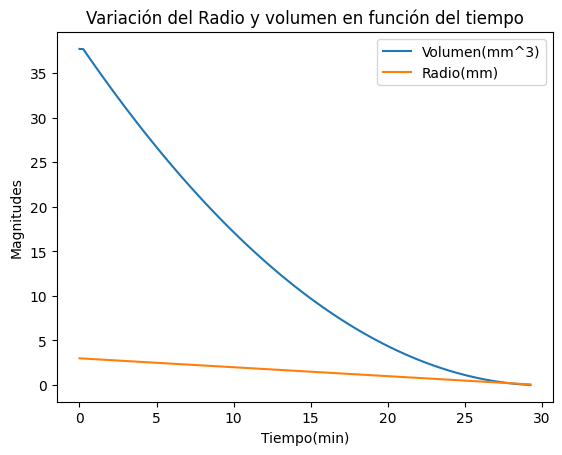

In [ ]:
plt.plot(timeChange,volumeChange,label="Volumen(mm^3)")
plt.plot(timeChange,radioChange,label="Radio(mm)")
plt.title("Variación del Radio y volumen en función del tiempo")
plt.xlabel("Tiempo(min)")
plt.ylabel("Magnitudes")
plt.legend()
plt.show()

# Ejercicio 4

Considere la situación en la cual un cocinero coloca una costilla de cerdo en un horno (a temperatura ambiente de $70°F$)
 y de manera simultánea enciende el horno hasta $400°F$ . Si le toma al horno 5 minutos alcanzar los $400°F$ y si lo hace de manera lineal, la temperatura en el horno $T_a(t)$ se describe de la siguiente manera:

 $$T_a(t)= \left\{ \begin{array}{lcc}
             70+66t&   si  & 0\leq t \leq 5 \\
             \\400 &  si  & t \geq 5
             \end{array}
   \right.$$

  Si la temperatura del costilla esta daba por $T(t)$ y obedece la ley de Newton del calentamiento con $T_a(t)$ como la temperatura ambiente: se tiene que:

  $$\frac{dT(t)}{dt}=k(T-T_{a}(t))$$
  Si la costillita se encuentra inicialmente a temperatura ambiente, la condición inicial apropiada es $T(0)=70$.

1. Determine el tiempo en el que  la costillita tendrá una temperatura de 105°F
2. Determine la temperatuta de la costilla a los 6 minutos despues de ser extraida del horno.
3. Realice una gráfica de la Temperatura de la costillita en el transcurso del tiempo ([0, 20])

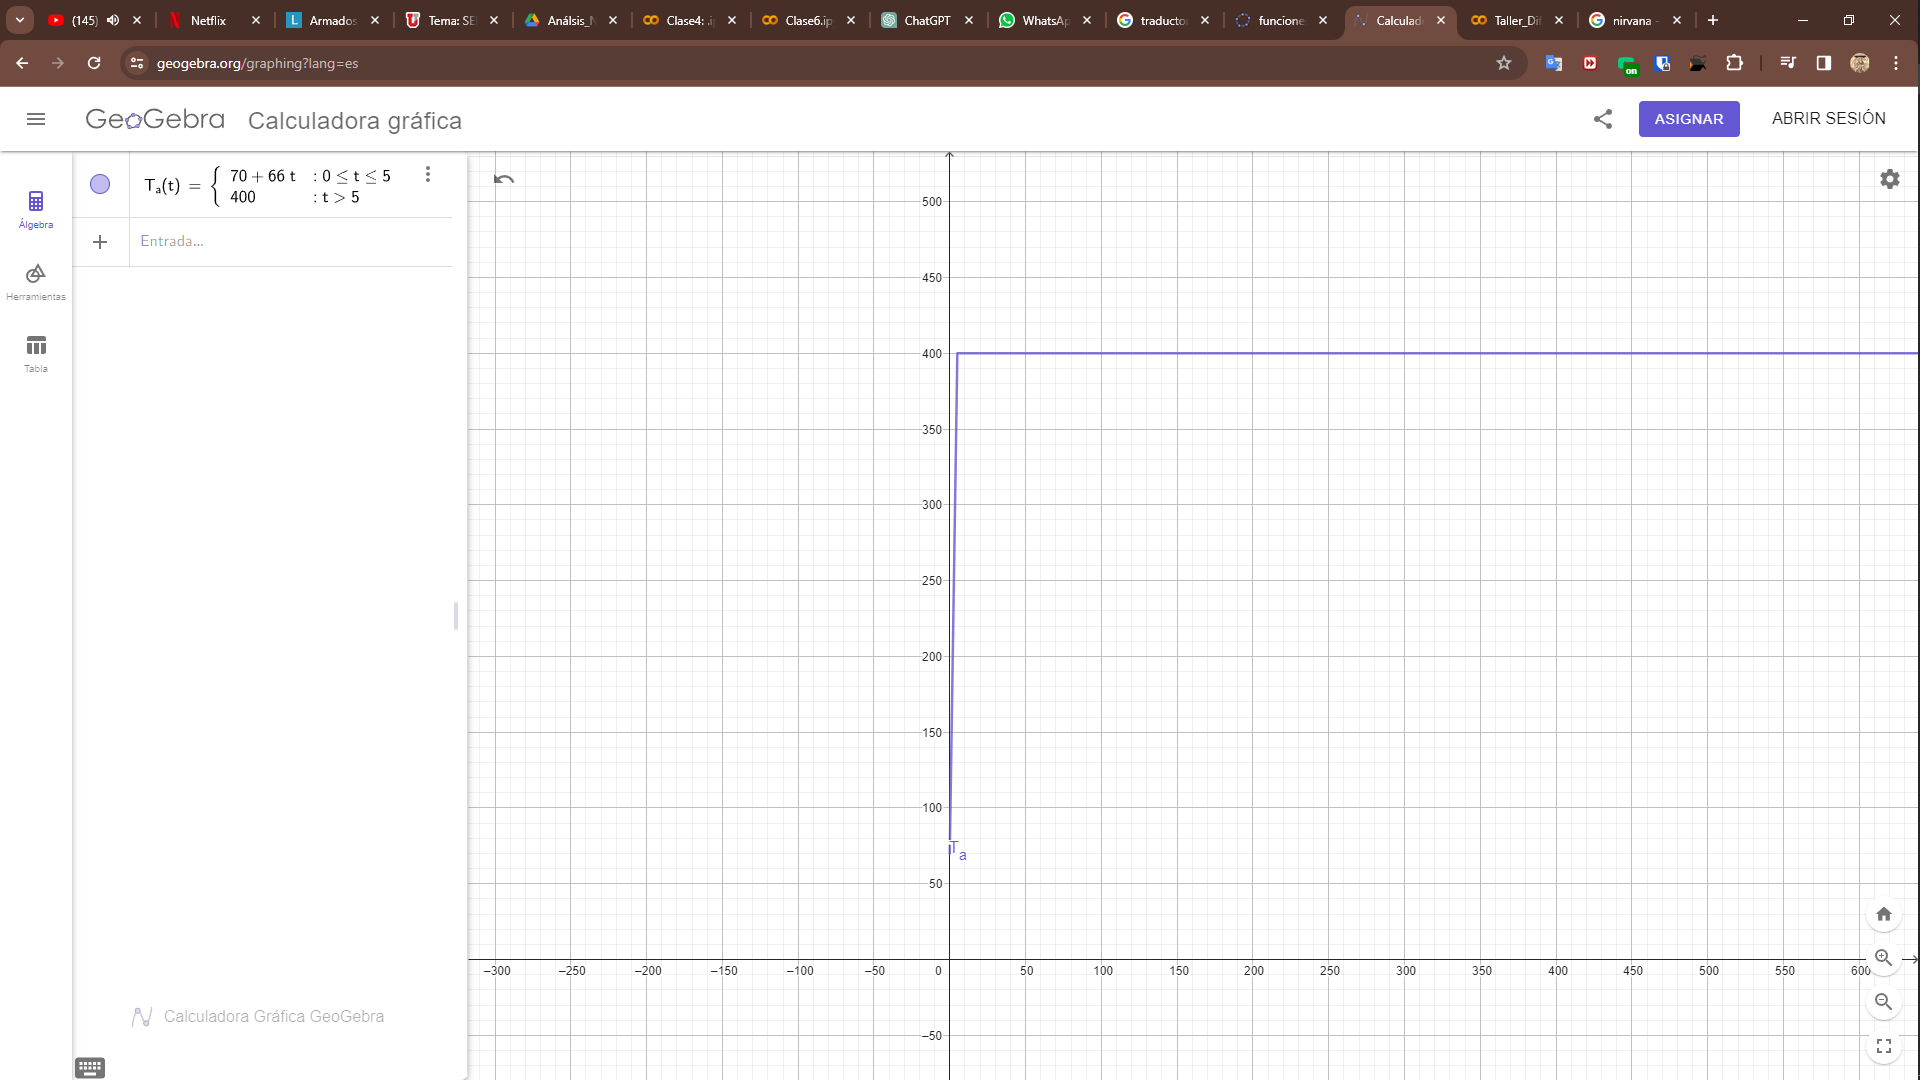

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def Ta(h):
  if h <= 5:
        return 70 + 66 * h
  else:
        return 400

def tempChange(T_finish,h,k):
    T_change = []
    t_change = []
    T_startCostillita = 70
    T_ = T_startCostillita
    t_start = h
    while T_ < T_finish:
      T_change.append(T_)
      t_change.append(t_start)
      T_ = h*k*(T_startCostillita - Ta(t_start)) + T_
      t_start += h
    return T_change,t_change


T_Change,t_Change = tempChange(105,0.01,-0.04)

data = pd.DataFrame({"tiempo":t_Change, "Cambio de temperatura": T_Change})
print(data)


     tiempo  Cambio de temperatura
0      0.01              70.000000
1      0.02              70.000264
2      0.03              70.000792
3      0.04              70.001584
4      0.05              70.002640
..      ...                    ...
510    5.11             104.386000
511    5.12             104.518000
512    5.13             104.650000
513    5.14             104.782000
514    5.15             104.914000

[515 rows x 2 columns]


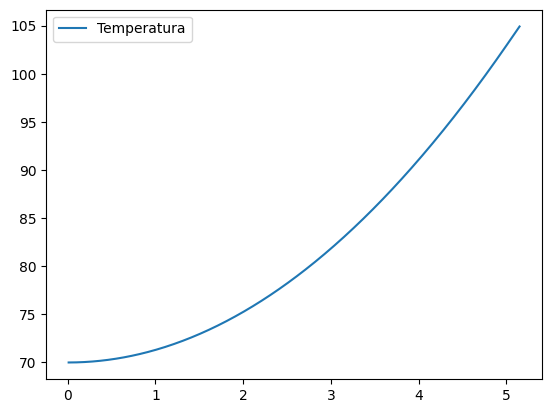

In [ ]:
plt.plot(t_Change,T_Change,label="Temperatura")
plt.legend()
plt.show()

In [ ]:
# Punto b
#En condiciones culinarias optimas una costilla debe retirarse del horno a unos
# 140°F aproximadamente, como el enunciado no especifica ni el tiempo ni la temperatura de salida de la costilla
# supondremos en caso particular de la situación

def timeRibChange(t_start,t_finish,h,k,Ta,TIRib):
  tRib_Change = []
  TRib_Change = []
  T_ = TIRib
  while t_start <= t_finish:
    tRib_Change.append(t_start)
    TRib_Change.append(T_ )
    T_ = h*k*(T_ - Ta) + T_
    t_start += h
  return tRib_Change,TRib_Change

tRib_Change,TRib_Change = timeRibChange(0,6,0.01,-0.04,70,140)

data = pd.DataFrame({"Tiempo":tRib_Change,"Cambio de temperatura":TRib_Change})
print(data)




     Tiempo  Cambio de temperatura
0      0.00             140.000000
1      0.01             139.972000
2      0.02             139.944011
3      0.03             139.916034
4      0.04             139.888067
..      ...                    ...
596    5.96             125.149493
597    5.97             125.127433
598    5.98             125.105382
599    5.99             125.083340
600    6.00             125.061307

[601 rows x 2 columns]


In [ ]:
#Punto c

# Ejercicio 5
\item La ecuación diferencial de Gompertz
$$N'(t)=\alpha \ln\biggl(\frac{K}{N(t)}\biggl) N(t)$$
sirve como modelo para el crecimiento de tumores, donde $N(t)$ es el número de células en un tumor en
el tiempo t. El número máximo de células que puede estar respaldado es $K$ y a es la constante relacionada con la habilidad proliferativa de células.
En un tipo particular de cáncer, $\alpha = 0.0439$, $K = 12000$, y $t$ se mide en meses. En el tiempo
$(t=0)$ el tumor se detecta, $N(0) =4000$. Usando las diferencias hacia adelante con $h=0.5$,
encuentre el número de meses para que $N(t)=11 000 $  células, el cual es el número letal para este
cáncer.
1.  Realice una gráfica de la Temperatura ambiente
2.  Realice una gráfica de tiempo contra cantidad de células


     Tiempo(Meses)  Numero de bacterias
0              0.5          4000.000000
1              1.0          4096.458159
2              1.5          4193.099780
3              2.0          4289.875211
4              2.5          4386.735641
..             ...                  ...
110           55.5         10893.925467
111           56.0         10917.048845
112           56.5         10939.713209
113           57.0         10961.926627
114           57.5         10983.697070

[115 rows x 2 columns]


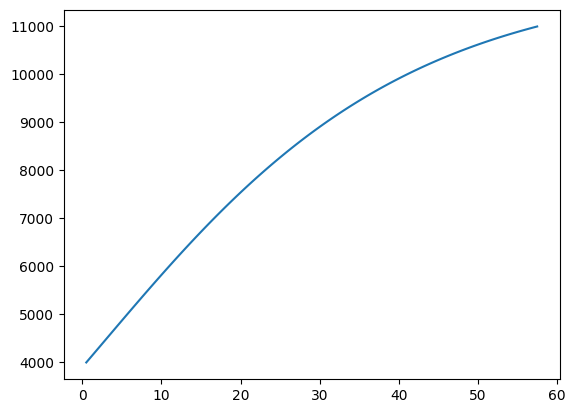

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def cellsVStime(c_start,c_finish,k,h,lam):
  months_change = []
  cells_change = []
  N_ = c_start
  t_start = h
  while N_ <= c_finish:
    months_change.append(t_start)
    cells_change.append(N_)
    N_ = lam*h*np.log(k/N_)*N_+N_
    t_start += h
  return months_change,cells_change

months_change,cells_change = cellsVStime(4000,11000,12000,0.5,0.0439)
data = pd.DataFrame({"Tiempo(Meses)":months_change,"Numero de bacterias":cells_change})
print(data)
plt.plot(months_change,cells_change)



# Ejercicio 6

La reacción química irreversible en la cual dos moléculas de dicromato de potasio sólido $K_2Cr_2O_7$, dos moléculas de agua $(H_2 O)$, y tres átomos de sulfuro sólido $(S)$ se combinan para producir tres moléculas del gas de dióxido de sulfuro $(SO_2 )$, cuatro moléculas de hidróxido de potasio sólido $(KOH)$, y
dos moléculas de óxido crómico sólido $(Cr_2 O_3 )$ se puede representar de manera simbólica mediante la
ecuación estequiométrica:
$$2K_2Cr_2O_7 + 2H_2O+3S \longrightarrow 4KOH+2Cr_2O_3+3SO_2$$
Si $n_1$ moléculas de $K_2Cr_2O_7$, $n_2$ moléculas de $H_2O$  y $n_3$ moléculas de $S$ están originalmente disponibles, la siguiente ecuación describe la cantidad $x(t)$ de KOH después del tiempo t:
$$x'=k\biggl(n_1-\frac{x}{2}\biggl)^2\biggl(n_2-\frac{x}{2}\biggl)^2\biggl(n_3-\frac{3x}{4}\biggl)^3$$
donde $k$ es la velocidad constante de la reacción. Si $k=6.22\times 10^{-19}$, $n_1=n_2=2\times 10^3$ y $n_3=3\times 10^3$, use la diferenciación numérica para determinar la forma en la que muchas unidades de hidróxido de potasio se habrán formado después de 0.2s

1. Realice una gráfica de la situación

     Tiempo  hidróxido de potasio sólido
0     0.000                     4.000000
1     0.001                   270.828705
2     0.002                   435.319092
3     0.003                   555.268694
4     0.004                   649.662100
..      ...                          ...
195   0.195                  2075.708787
196   0.196                  2077.311109
197   0.197                  2078.904114
198   0.198                  2080.487904
199   0.199                  2082.062576

[200 rows x 2 columns]


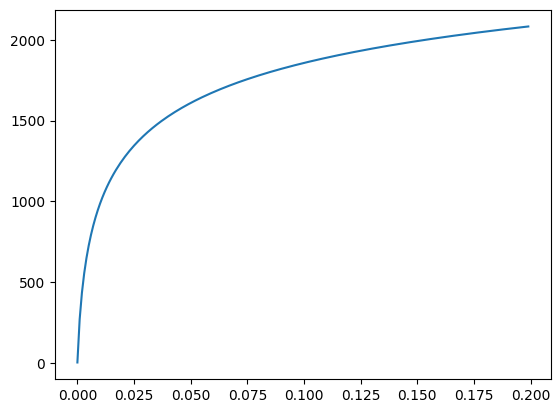

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ti = 0
tf = 0.2
k  = 6.22*10**-19
h = 0.001
n_1 = 2*10**3
n_2 = n_1
n_3 = 3*10**3
x_ = 4
xList = []
tList = []
while ti <= tf:
    xList.append(x_)
    tList.append(ti)
    x_ = k * h * ((n_1-(x_/2))**2) * ((n_2-(x_/2))**2) * ((n_3-(3*x_/4))**3) ++
    ti += h

data = pd.DataFrame({"Tiempo":tList,"hidróxido de potasio sólido": xList})
print(data)

plt.plot(tList,xList)

